In [1]:
#running cells sequentially from top to bottom should successfully reproduce the research

#you may occasionally need to reimport statsmodels.api

import econml
import pandas as pd

import statsmodels.api as sm

from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_csv("C:\datasets\POILBREUSDM2.csv")#original data with price level derived


#print(data)

truncated_data = data
truncated_data = truncated_data.dropna() #our monthly GDP dataset only goes back to 1992, this oil dataset stops at 1990
print(truncated_data)

#truncated_data("Lag-GDP") = truncated_data("GDP")


           DATE  POILBREUSDM        GDP  Price level  Maj_event
24   01/01/1992    18.550000   9486.357    66.578685        0.0
25   01/02/1992    18.480000   9527.533    66.716169        0.0
26   01/03/1992    17.590000   9606.143    66.801102        0.0
27   01/04/1992    19.060000   9612.489    67.030025        0.0
28   01/05/1992    20.030000   9594.652    67.058037        0.0
..          ...          ...        ...          ...        ...
377  01/06/2021    73.067273  19409.726   117.999898        0.0
378  01/07/2021    74.386818  19339.425   118.593639        0.0
379  01/08/2021    70.020909  19518.596   119.096085        0.0
380  01/09/2021    74.598182  19577.018   119.569368        0.0
381  01/10/2021    83.650000  19874.681   120.321122        0.0

[358 rows x 5 columns]


In [3]:
num_lags = 24

for lag in range(1, (num_lags + 1), 1):
    truncated_data['lag_' + str(lag)] = truncated_data.POILBREUSDM.shift(lag)

<ipython-input-3-48c48c69fb11>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truncated_data['lag_' + str(lag)] = truncated_data.POILBREUSDM.shift(lag)


In [4]:
print(truncated_data) #these lag values are not directly used

           DATE  POILBREUSDM        GDP  Price level  Maj_event      lag_1  \
24   01/01/1992    18.550000   9486.357    66.578685        0.0        NaN   
25   01/02/1992    18.480000   9527.533    66.716169        0.0  18.550000   
26   01/03/1992    17.590000   9606.143    66.801102        0.0  18.480000   
27   01/04/1992    19.060000   9612.489    67.030025        0.0  17.590000   
28   01/05/1992    20.030000   9594.652    67.058037        0.0  19.060000   
..          ...          ...        ...          ...        ...        ...   
377  01/06/2021    73.067273  19409.726   117.999898        0.0  68.043333   
378  01/07/2021    74.386818  19339.425   118.593639        0.0  73.067273   
379  01/08/2021    70.020909  19518.596   119.096085        0.0  74.386818   
380  01/09/2021    74.598182  19577.018   119.569368        0.0  70.020909   
381  01/10/2021    83.650000  19874.681   120.321122        0.0  74.598182   

         lag_2      lag_3      lag_4      lag_5  ...     lag_15

In [5]:
#sm.tsa.arima_model.ARMA(truncated_data[2], order=(24, 1), dates=truncated_data[0], freq=M)
#sm.tsa.arima.ARMA(truncated_data[2], order=(24, 1), dates=truncated_data[0], freq=M)
#sm.tsa.arima_model.ARMA(truncated_data[2], order=(24, 1), dates=truncated_data[0], freq=M)


0      21.250000
1      19.930000
2      18.370000
3      16.490000
4      16.340000
         ...    
377    73.067273
378    74.386818
379    70.020909
380    74.598182
381    83.650000
Name: POILBREUSDM, Length: 382, dtype: float64
(-2.168610396967283, 0.2178346307531666, 1, 380, {'1%': -3.4476763783532585, '5%': -2.869176103659426, '10%': -2.570837873961219}, 2125.079366569578)


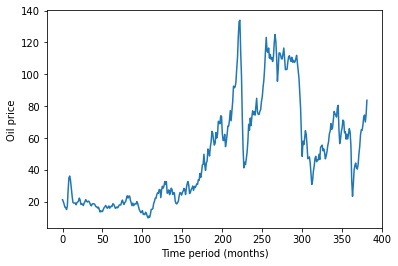

In [6]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
series = data.POILBREUSDM
print(series)
oil = series.values
test_statistics = adfuller(oil)
print(test_statistics) #first result is test statistic, 2nd result p-value
#in this example we can accept the null hypothesis that it has a unit root
#since -2.16 > -2.57 so we fail to reject at 1%, 5%, 10% significance levels
plt.xlabel("Time period (months)")
plt.ylabel("Oil price")
plt.plot(oil)
plt.show()#we need to apply additional processing to make this series stationary

#subtract linear time trend via differencing

diff = []
differ = 0
for i in range(2, 382, 1): #len(oil) is 382
    differ = oil[i] - oil[i-1]
    diff.append(differ)
#print(diff) for test purposes






358
(-12.369142760311092, 5.330017793649339e-23, 0, 356, {'1%': -3.448853029339765, '5%': -2.869693115704379, '10%': -2.571113512498422}, 2004.543914037329)


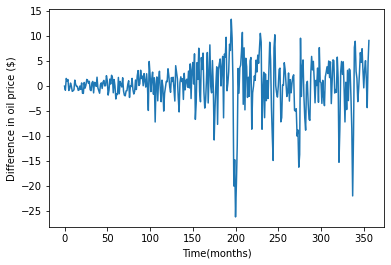

In [16]:

#subtract linear time trend via differencing
oil = truncated_data.POILBREUSDM
print(len(oil))
diff = []
differ = 0
for i in range(25, 382, 1): #len(oil) is 358
    differ = oil[i] - oil[i-1]
    diff.append(differ)
#print(diff) for test purposes

#oil = series.values
test_statistics = adfuller(diff)
print(test_statistics) #first result is test statistic, 2nd result p-value
#in this example we can accept the null hypothesis that it has a unit root
#since -2.16 > -2.57 so we fail to reject at 1%, 5%, 10% significance levels
plt.xlabel("Time(months)")
plt.ylabel("Difference in oil price ($)")
plt.plot(diff)
plt.show()#we need to apply additional processing to make this series stationary
#-12.6 < -3.44 can reject H0 at all 3 significance levels including 1%
#this means we have successfully detrended the series and it is now stationary

(-0.49693318954043325, 0.892613575947117, 6, 351, {'1%': -3.44911857009962, '5%': -2.8698097654570507, '10%': -2.5711757061225153}, 4396.408721727736)


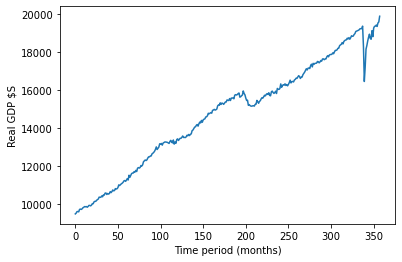

In [8]:
#now do the same with GDP

series = truncated_data.GDP
gdp = series.values
test_statistics = adfuller(gdp)
print(test_statistics)
plt.xlabel("Time period (months)")
plt.ylabel("Real GDP $S")
plt.plot(gdp)
plt.show()
#this is obviously not stationary, but we can subtract a linear time trend as before

In [9]:
print(len(oil))

358


356
(-10.348564864491545, 2.5723211919596015e-18, 5, 350, {'1%': -3.4491725955218655, '5%': -2.8698334971428574, '10%': -2.5711883591836733}, 4370.878029415451)


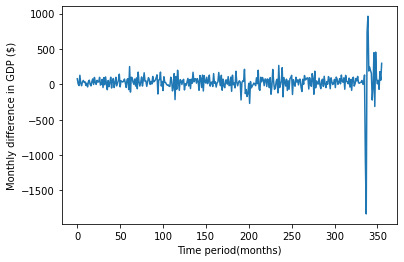

In [17]:

diff_gdp = []
differ = 0
for i in range(2, 358, 1): #len(oil) is 382
    differ = gdp[i] - gdp[i-1]
    diff_gdp.append(differ)
#print(diff) for test purposes
print(len(diff_gdp))
#oil = series.values
test_statistics = adfuller(diff_gdp)
print(test_statistics) #first result is test statistic, 2nd result p-value
plt.xlabel("Time period(months)")
plt.ylabel("Monthly difference in GDP ($)")
plt.plot(diff_gdp)
plt.show()#we need to apply additional processing to make this series stationary
#-10.3 < -3.44 can reject H0 at all 3 significance levels including 1%
#this means we have successfully detrended the series and it is now stationary

In [11]:
detrended_data = truncated_data

#detrended_data.POILBRUESDM = diff
#detrended_data.gdp = diff_gdp



#detrended_data.drop[gdp]
#detrended_data.drop[POILBRUESDM]

detrended_data_two = pd.DataFrame(diff, columns=["diff_oil"])
detrended_data_three = pd.DataFrame(diff_gdp, columns=["diff_gdp"]) #easier to manually merge

detrended_data_two.to_csv("C:\datasets\oil diff.csv")
detrended_data_three.to_csv("C:\datasets\gdp diff.csv")
#print(detrended_data_two)
#detrended_data_two = detrended_data_two.dropna()
#print(detrended_data_two)
#detrended_data_two["diff_GDP"] = diff_gdp
#print(detrended_data_two)

In [30]:
#Fit ARIMA model to series
#Uncomment/comment models as appropiate
from statsmodels.tsa.arima.model import ARIMA

#model = ARIMA(exog=truncated_data["POILBREUSDM"], endog=truncated_data["GDP"], order=(24, 0, 24))

#model = ARIMA(exog=truncated_data["POILBREUSDM"], endog=truncated_data["GDP"], order=(24, 1, 0))
#highest significant lag is 10, rerun with 10 lags

model = ARIMA(exog=truncated_data["POILBREUSDM"], endog=truncated_data["GDP"], order=(3, 1, 1))
res = model.fit()
print(res.summary())
#print(model.params)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                  358
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -2293.769
Date:                Wed, 22 Dec 2021   AIC                           4599.538
Time:                        23:53:41   BIC                           4622.805
Sample:                             0   HQIC                          4608.792
                                - 358                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
POILBREUSDM     8.1630      1.248      6.542      0.000       5.717      10.609
ar.L1          -0.6968      0.515     -1.353      0.176      -1.706       0.313
ar.L2          -0.1698      0.041     -4.147    

In [20]:
import numpy as np
import statsmodels as sm
import statsmodels.api as sm

In [21]:

data5 = pd.read_csv("C:\datasets\POILBREUSDM5.csv") #this a dataset variation that is more clean and has differences
data5 = data5.dropna()
print(data5)

#exogeneous_variables = data5["GDP"], data5["Price level"], data5["Diff_GDP"], data5["Diff_oil"]
exogeneous_variables = data5[["Price_level", "Interest_Rate", "Diff_oil"]]
endogeneous_variables = data5["Diff_GDP"]
exogeneous_variables = sm.add_constant(exogeneous_variables)
model = sm.OLS(endogeneous_variables, exogeneous_variables)

result = model.fit()

print(result.summary())

           DATE  POILBREUSDM        GDP  Price_level  Diff_GDP  Diff_oil  \
0    01/01/1992    18.550000   9486.357    66.578685  0.000000  0.000000   
1    01/02/1992    18.480000   9527.533    66.716169  0.137484 -0.070000   
2    01/03/1992    17.590000   9606.143    66.801102  0.084933 -0.890000   
3    01/04/1992    19.060000   9612.489    67.030025  0.228923  1.470000   
4    01/05/1992    20.030000   9594.652    67.058037  0.028012  0.970000   
..          ...          ...        ...          ...       ...       ...   
353  01/06/2021    73.067273  19409.726   117.999898  0.628874  5.023939   
354  01/07/2021    74.386818  19339.425   118.593639  0.593740  1.319545   
355  01/08/2021    70.020909  19518.596   119.096085  0.502446 -4.365909   
356  01/09/2021    74.598182  19577.018   119.569368  0.473283  4.577273   
357  01/10/2021    83.650000  19874.681   120.321122  0.751754  9.051818   

     Interest_Rate  
0             4.03  
1             4.06  
2             3.98  
3  

In [22]:
result2 = result.get_robustcov_results(cov_type='HAC', use_t=None, maxlags=24)
print(result2.summary())
predictions = []
#for row in range(1, 359, 1):
#    predictions += -0.1624 + 0.0032 * exogeneous_variables["Price_level"].index(row)
#print(predictions)

#uneeded - MSE ("error") already accounts for predictions

                            OLS Regression Results                            
Dep. Variable:               Diff_GDP   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     4.792
Date:                Wed, 22 Dec 2021   Prob (F-statistic):            0.00276
Time:                        22:35:35   Log-Likelihood:                 157.25
No. Observations:                 358   AIC:                            -306.5
Df Residuals:                     354   BIC:                            -291.0
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1624      0.136     -1.197

TypeError: 'Int64Index' object is not callable

In [ ]:
#Everything below this point was remade in R as there were significant technical issues getting the VAR and econml libraries to work

from statsmodels.tsa.api import VAR
import numpy as np
data6 = pd.read_csv("C:\datasets\POILBREUSDM6.csv")
data7 = pd.read_csv("C:\datasets\POILBREUSDM7.csv")
data1 = pd.read_csv("C:\datasets\POILBREUSDM.csv")

#data6 = np.asarray(data6)
#exogeneous_variables = data6[["Diff_oil", "Interest_Rate", "Price_level"]]
#endogeneous_variables = data6["Diff_GDP"]
#data6 = np.asarray(data6)
model = VAR(data1)

results3 = model.fit(2)
print(results3.summary())

In [ ]:
np.asarray(data6)

In [ ]:
import numpy as np
import sklearn
from econml.orf import DMLOrthoForest, DROrthoForest

